In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

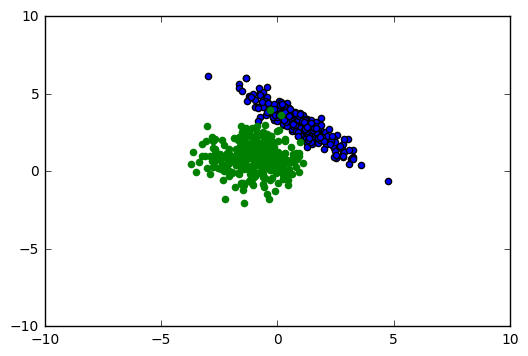

In [4]:
mean_01 = np.array([1, 3])
mean_02 = np.array([-1, 1])

cov_01 = np.array([[1, -0.9], [-0.9, 1.0]])
cov_02 = np.array([[1, 0.], [0., 1.0]])

dt1 = np.random.multivariate_normal(mean_01, cov_01, 300)
dt2 = np.random.multivariate_normal(mean_02, cov_02, 300)

plt.figure(0)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.scatter(dt1[:, 0], dt1[:, 1])
plt.scatter(dt2[:, 0], dt2[:, 1], color='green')

plt.show()

In [9]:
print dt1.shape, dt2.shape
data = np.zeros((600, 2))
data[:300, :] = dt1
data[300:, :] = dt2

labels = np.zeros((600, 1))
labels[300:] = 1

print data.mean(axis=0)
print data[:5, :]

(300, 2) (300, 2)
[-0.02844679  1.99891953]
[[ 0.22163303  3.93298485]
 [ 1.77365017  2.10448904]
 [-0.64820019  4.87785111]
 [ 0.32360463  4.10362241]
 [ 1.76660968  2.90665646]]


(600, 2)


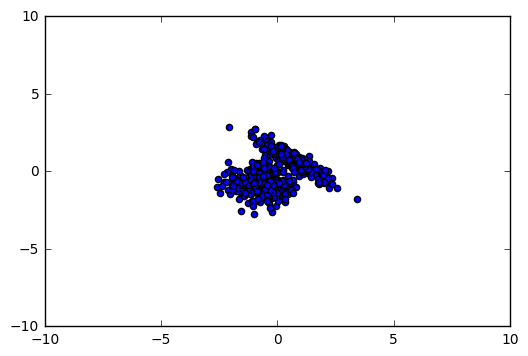

[[ 1.00166945  0.25917019]
 [ 0.25917019  1.00166945]]


In [15]:
data_std=(data - data.mean(axis=0))/(data.std(axis=0))
print data_std.shape

plt.figure(0)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.scatter(data_std[:, 0], data_std[:, 1])
plt.show()

print np.cov(data_std.T)

In [23]:
print labels.shape
print data_std.mean(axis=0)

all_data = np.zeros((600, 3))
all_data[:, :2] = data_std
all_data[:, -1] = labels.flatten()

np.random.shuffle(all_data)
print all_data[:10, -1]

(600, 1)
[ -4.82669460e-16   1.27051147e-15]
[ 0.  1.  1.  0.  0.  0.  0.  1.  1.  0.]


In [28]:
split = int(0.8 * all_data.shape[0])
print split, all_data.shape

X_train = all_data[:split, :2]
X_test = all_data[split:, :2]

y_train = all_data[:split, -1]
y_test = all_data[split:, -1]

print 'X training: ', X_train.shape
print 'X testing: ', X_test.shape

480 (600, 3)
X training:  (480, 2)
X testing:  (120, 2)


In [30]:
def dist(x1, x2):
    # Eucledian distance
    # x1 and x2 are two vector points
    # ex: x1 = [1.0, -0.3]
    diff = (x1 - x2)
    diff_sq = diff**2
    sum_diff = diff_sq.sum()
    return np.sqrt(sum_diff)

pt1 = np.array([1.0, 1.0])
pt2 = np.array([0.0, 0.0])
print dist(pt1, pt2) # output sqrt(2)

1.41421356237


In [68]:
def knn(X_train, xt, y_train, k=5):
    n_rows = X_train.shape[0]
    dist_labels = []
    for px in range(n_rows):
        pt_dist = dist(X_train[px], xt)
        dist_labels.append([pt_dist, y_train[px]])
    dist_labels = sorted(dist_labels)
    neighbours = np.asarray(dist_labels[:k])[:, -1]
    labs = np.unique(neighbours, return_counts=True)
    return 1.0
    #return labs[0][labs[1].argmax()]

In [69]:
preds = []

for tx in range(X_test.shape[0]):
    preds.append(knn(X_train, X_test[tx], y_train, k=2))

preds = np.asarray(preds)
print len(preds)
print preds[:10]
print y_test[:10]
counter = 0

for px in range(preds.shape[0]):
    if preds[px] == y_test[px]:
        counter += 1

print str(float(counter)*100/y_test.shape[0]) + "%"

120
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  0.  1.  1.  0.  0.  0.  0.]
48.3333333333%
